# Key input info

In [6]:
root_name = '250604'
root_dir = rf"../../data/output/{root_name}"

In [25]:
import os
os.environ['GDAL_DATA'] = r'/usr/share/gdal'
from test4plot2 import plot_double, clearing, plot_cross_tab
from analysis import basic_stat, find_knee
from spatial_plot import plot_compared_cs, plot_zone_cs, match_cs, plot_delta_zone
from delay_analysis import plot_demand_heatmap
import pandas as pd
import geopandas as gpd
from pyproj import CRS
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import IFrame
warnings.simplefilter("ignore")

In [54]:
pd.options.display.float_format = '{:.1f}'.format  # 所有浮点数保留零位小数
means_stat_columns = ['bulit_num', 'fast_num_avg', 'slow_num_avg', 'bus_num']
MEANS_PARETO = []
KNEES = []
for name in os.listdir(root_dir):
    full_path = os.path.join(root_dir, name)
    if os.path.isdir(full_path) and name.endswith(f'_{root_name}'):
        city_name = name[:-len(f'_{root_name}')]
        cs_gdf = gpd.read_file(rf'../../data/input/cs_gdf/{city_name}.shp', crs=CRS.from_epsg(4507))  # 充电站
        cs_num = len(cs_gdf)
        OBJ_G = pd.read_csv(rf"../../data/output/{root_name}/{city_name}_{root_name}/archive_objs.csv")
        VAR_G = pd.read_csv(rf"../../data/output/{root_name}/{city_name}_{root_name}/archive_vars.csv")
        OBJ_G = clearing(OBJ_G)
        STAT_G = basic_stat(OBJ_G, VAR_G, cs_num)
        MEANS_G = STAT_G[means_stat_columns].mean()
        MEANS_G = pd.DataFrame([MEANS_G.values], columns=means_stat_columns)
        # 添加city_name和cs_num列并调整列顺序
        MEANS_G['city_name'] = city_name
        MEANS_G['candidate_num'] = cs_num
        MEANS_G = MEANS_G[['city_name', 'candidate_num'] + means_stat_columns]
        MEANS_PARETO.append(MEANS_G)

        knee_no_G = find_knee(STAT_G)
        row_G = STAT_G.loc[STAT_G['solution_no'] == knee_no_G]
        row_G['city_name'] = city_name
        row_G['candidate_num'] = cs_num
        KNEES.append(row_G)
        
MEANS_PARETO = pd.concat(MEANS_PARETO, ignore_index=True).sort_values('candidate_num', ascending=False)
KNEES = pd.concat(KNEES, ignore_index=True).sort_values('candidate_num', ascending=False)
KNEES['built_ratio'] = KNEES['bulit_num'] / KNEES['candidate_num']
front = ['city_name']
rest = [c for c in KNEES.columns if c not in front]
# 重新排序
KNEES = KNEES[ front + rest ]

## 1. Overvall

### 1.1 Average statistics of Pareto solutions

In [66]:
MEANS_PARETO = MEANS_PARETO.reset_index(drop=True)
MEANS_PARETO

,city_name,candidate_num,bulit_num,fast_num_avg,slow_num_avg,bus_num
0,北京市,1551,728.9,13.9,13.8,34.3
1,重庆市,1261,786.8,13.9,13.8,8.3
2,上海市,1242,678.4,13.8,13.9,12.2
3,广州市,944,455.5,13.8,13.7,19.1
4,成都市,901,426.6,13.4,13.8,5.9
5,武汉市,706,324.7,13.5,13.9,1.3
6,南京市,645,275.2,13.6,13.5,0.0
7,深圳市,626,281.1,13.5,13.4,26.4
8,西安市,451,215.1,13.4,13.4,5.0
9,哈尔滨市,341,161.6,12.8,13.5,16.1


### 1.2 Average statistics of knee points

In [70]:
KNEES['built_ratio'] = KNEES['built_ratio'].map('{:.2f}'.format)
KNEES = KNEES.reset_index(drop=True)
KNEES

,city_name,solution_no,obj1,obj2,obj3,bulit_num,fast_num_avg,slow_num_avg,bus_type,bus_num,candidate_num,built_ratio
0,北京市,SA146999,2379.9,56596.5,0.0,743,13.7,13.7,10,0,1551,0.48
1,重庆市,SA146784,1704.7,31962.7,0.0,683,13.6,14.1,10,0,1261,0.54
2,上海市,SA143664,1662.0,39566.2,0.0,642,13.9,13.4,10,0,1242,0.52
3,广州市,SA146116,1434.8,34660.9,0.0,467,14.2,14.0,10,20,944,0.49
4,成都市,SA146538,1090.8,24770.9,0.0,409,13.8,13.9,10,0,901,0.45
5,武汉市,SA145775,763.2,19024.1,0.0,316,13.7,13.8,10,0,706,0.45
6,南京市,SA143144,815.0,19285.3,0.0,256,14.2,12.6,10,0,645,0.40
7,深圳市,SA145159,987.3,27361.1,0.0,293,13.9,13.4,10,0,626,0.47
8,西安市,SA145533,565.9,15390.6,0.0,208,12.8,13.6,10,0,451,0.46
9,哈尔滨市,SA143799,465.4,9979.3,0.0,172,12.1,13.7,10,20,341,0.50


## 2. Pareto front

This scenario has 304 pareto solutions


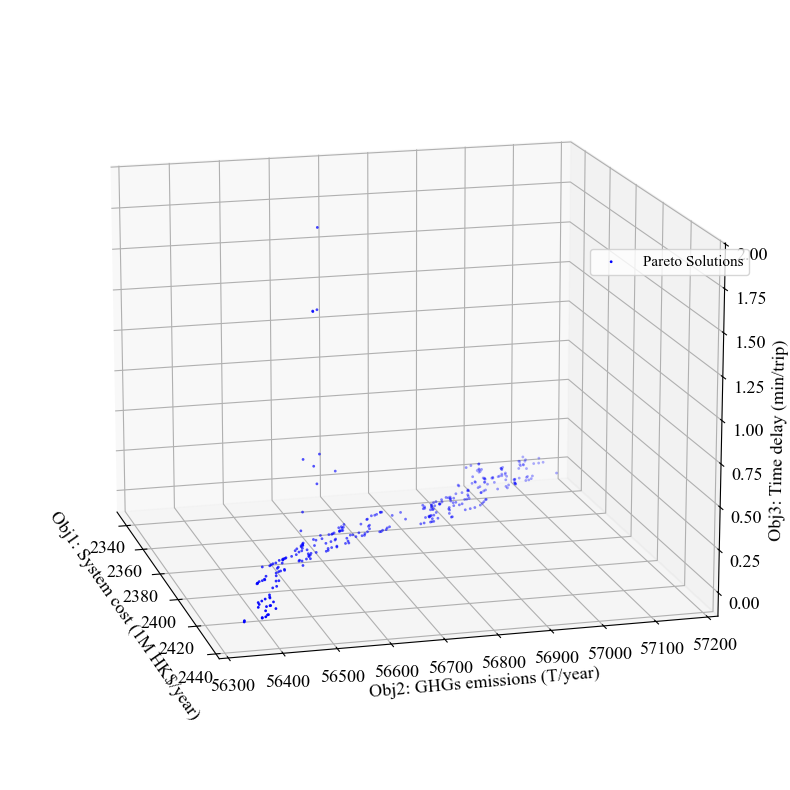

In [78]:
city_name = '北京市'
OBJ_G = pd.read_csv(rf"../../data/output/{root_name}/{city_name}_{root_name}/archive_objs.csv")
OBJ_G = clearing(OBJ_G)
plot_double(OBJ_G,save_pic=False)